# EX1

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creation d'une liste de dimension [4096 x 1] avec des zeros dans les places paires et des ones dans les places unpaires.

In [42]:
list_1 = [0]*4096
for i in range(len(list_1)//2):
    list_1[2*i+1] = 1

### Convertire la list en array avec chaque element de type numpy.float32

In [43]:
list_1 = np.array(list_1,dtype=np.float32)

### Verifier les dimensions de l'array

In [44]:
print(list_1.shape)
print(list_1)

(4096,)
[0. 1. 0. ... 1. 0. 1.]


### Mettre des zeros à la place des ones et des idx+1 à la place des zeros.

In [45]:
print(np.sum(list_1==0))
print(np.sum(list_1==1))
list_1_old = list_1.copy()

list_1[list_1_old==0],list_1[list_1_old==1] = np.where(list_1_old==0)[0]+np.ones((np.sum(list_1_old==0))), np.zeros((np.sum(list_1_old==1)))

2048
2048


### Faire le plot

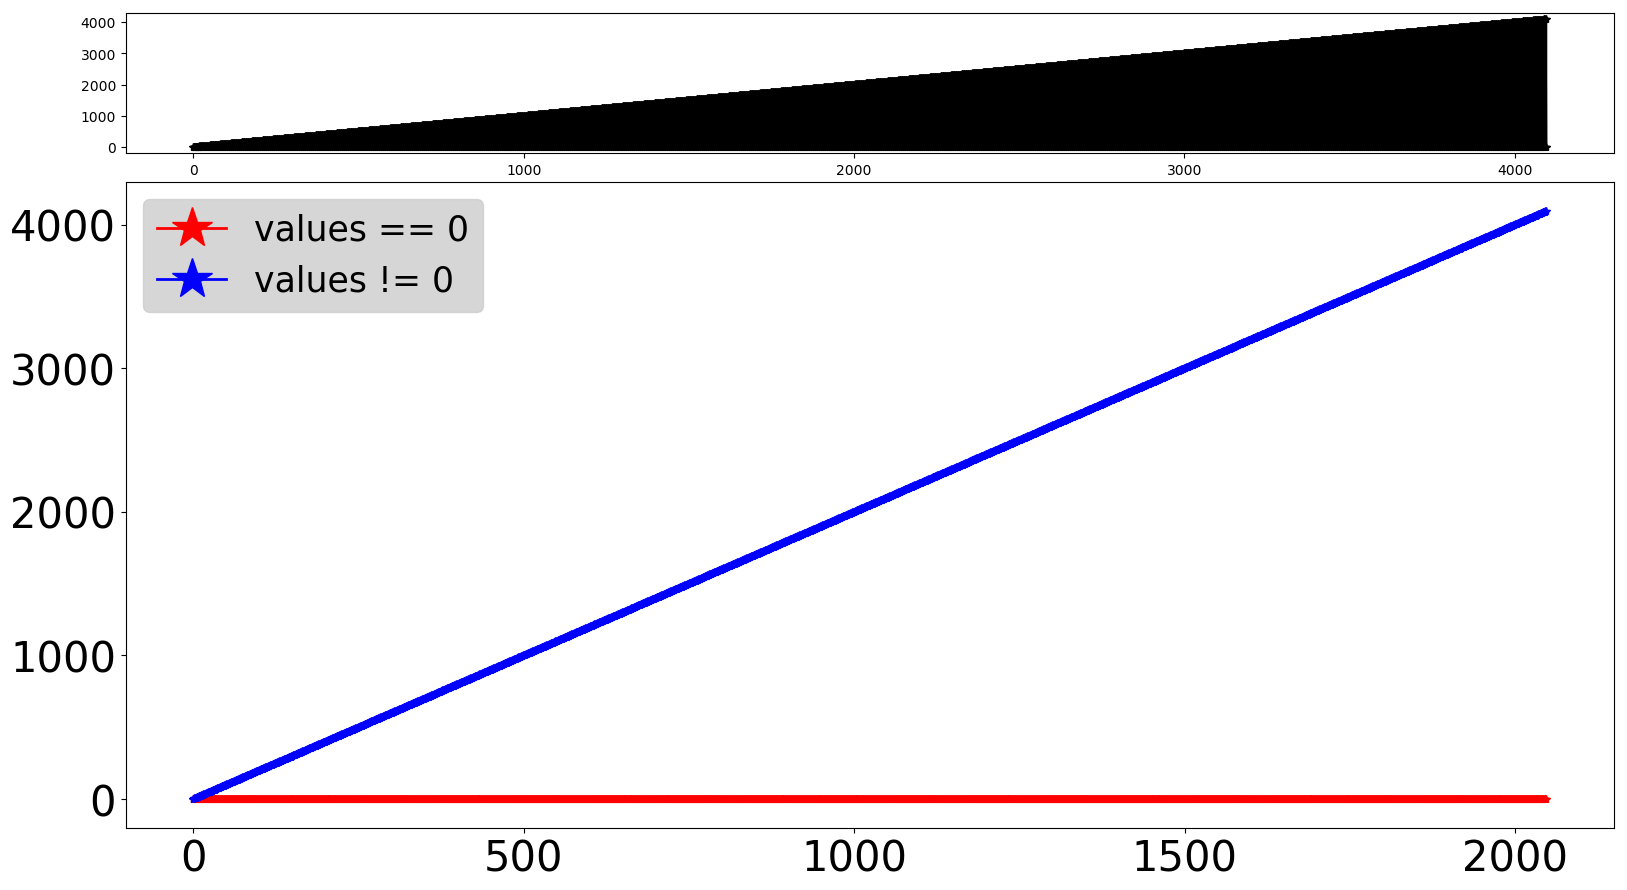

In [58]:
fig = plt.figure(figsize=(19.20,10.80), dpi=100)
n_col = 1
n_row = 5

ax1 = plt.subplot2grid((n_row,n_col), (0,0),rowspan = 1, colspan=1)
ax2 = plt.subplot2grid((n_row,n_col), (1,0),rowspan = 4, colspan=1)

ax1.plot(np.arange(len(list_1)),list_1, 'k*-', markersize=6,linewidth = 2)
ax2.plot(np.arange(len(list_1[list_1==0])),list_1[list_1==0],'r-*',markersize=6,linewidth = 2,label='values == 0')
ax2.plot(np.arange(len(list_1[list_1!=0])),list_1[list_1!=0],'b-*',markersize=6,linewidth = 2,label='values != 0')
legenda2 = ax2.legend(loc=2,markerscale =5, facecolor = '#CCCCCC', prop={'size': 25})
ax2.tick_params(axis='both', labelsize=30)
plt.show()

# EX2

### Créer array de dimension 4096 x 1 avec elements egual à y = sin(10x) + 2 sin (x) - 3 sin (x/2), avec x dans le range [0,30] et interval fix entre les x.

In [131]:
x = np.linspace(0,30,4096)
y = np.sin(10*x) + 2*np.sin(x) - 3 * np.sin(x/2)

### Ajouter du bruit random au vecteur. Le bruit doit être de niveau 10^-2. Utiliser un seed pour pouvoir repeter l'exercise avec le même bruit.

In [132]:
bruit =  np.random.RandomState(42)
y += bruit.rand(4096)/1e1

### Convertire l'array à dataframe

In [85]:
df = pd.DataFrame(y)
df.rename(columns={0: 'y'})

,y
0,0.074908
1,0.267000
2,0.299720
3,0.348733
4,0.334713
5,0.407664
6,0.459113
7,0.689477
8,0.702572
9,0.787100


### Créer un array où chaque element est la moyenne sur fenetres de 10 points du vecteur de 4096 points

In [90]:
y2 = df.rolling(10,min_periods=10).mean()
print(y2)
print(np.shape(y2))
y2.rename(columns={0: 'mean'})

             0
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.437100
10    0.500554
11    0.569410
12    0.637482
13    0.693074
14    0.753842
15    0.811274
16    0.869423
17    0.911899
18    0.953651
19    0.986057
20    1.034033
21    1.048809
22    1.064469
23    1.088976
24    1.110749
25    1.133868
26    1.137612
27    1.137977
28    1.136517
29    1.121749
...        ...
4066 -3.346179
4067 -3.367496
4068 -3.415658
4069 -3.465875
4070 -3.515771
4071 -3.559828
4072 -3.619189
4073 -3.670345
4074 -3.734037
4075 -3.786129
4076 -3.842751
4077 -3.920267
4078 -3.982210
4079 -4.058462
4080 -4.114560
4081 -4.186117
4082 -4.247046
4083 -4.304200
4084 -4.371624
4085 -4.437839
4086 -4.497120
4087 -4.540916
4088 -4.586459
4089 -4.633706
4090 -4.672669
4091 -4.706223
4092 -4.740545
4093 -4.763749
4094 -4.783582
4095 -4.792658

[4096 rows x 1 columns]
(4096, 1)


,mean
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.437100


### Faire un fit polynomial sur l'array de moyennes

In [118]:
y_mean = np.reshape(np.array(y2),(4096,))[9:]
x_mean= x[9:]


p = np.poly1d(np.polyfit(x_mean,y_mean,8))
fitted_vector = p(x_mean)
print(fitted_vector)

[-4.97255661e-02 -2.36474428e-02  1.99738294e-03 ... -6.49450359e+00
 -6.54429547e+00 -6.59450644e+00]


### Faire le plot 1D des moyenne avec le fit

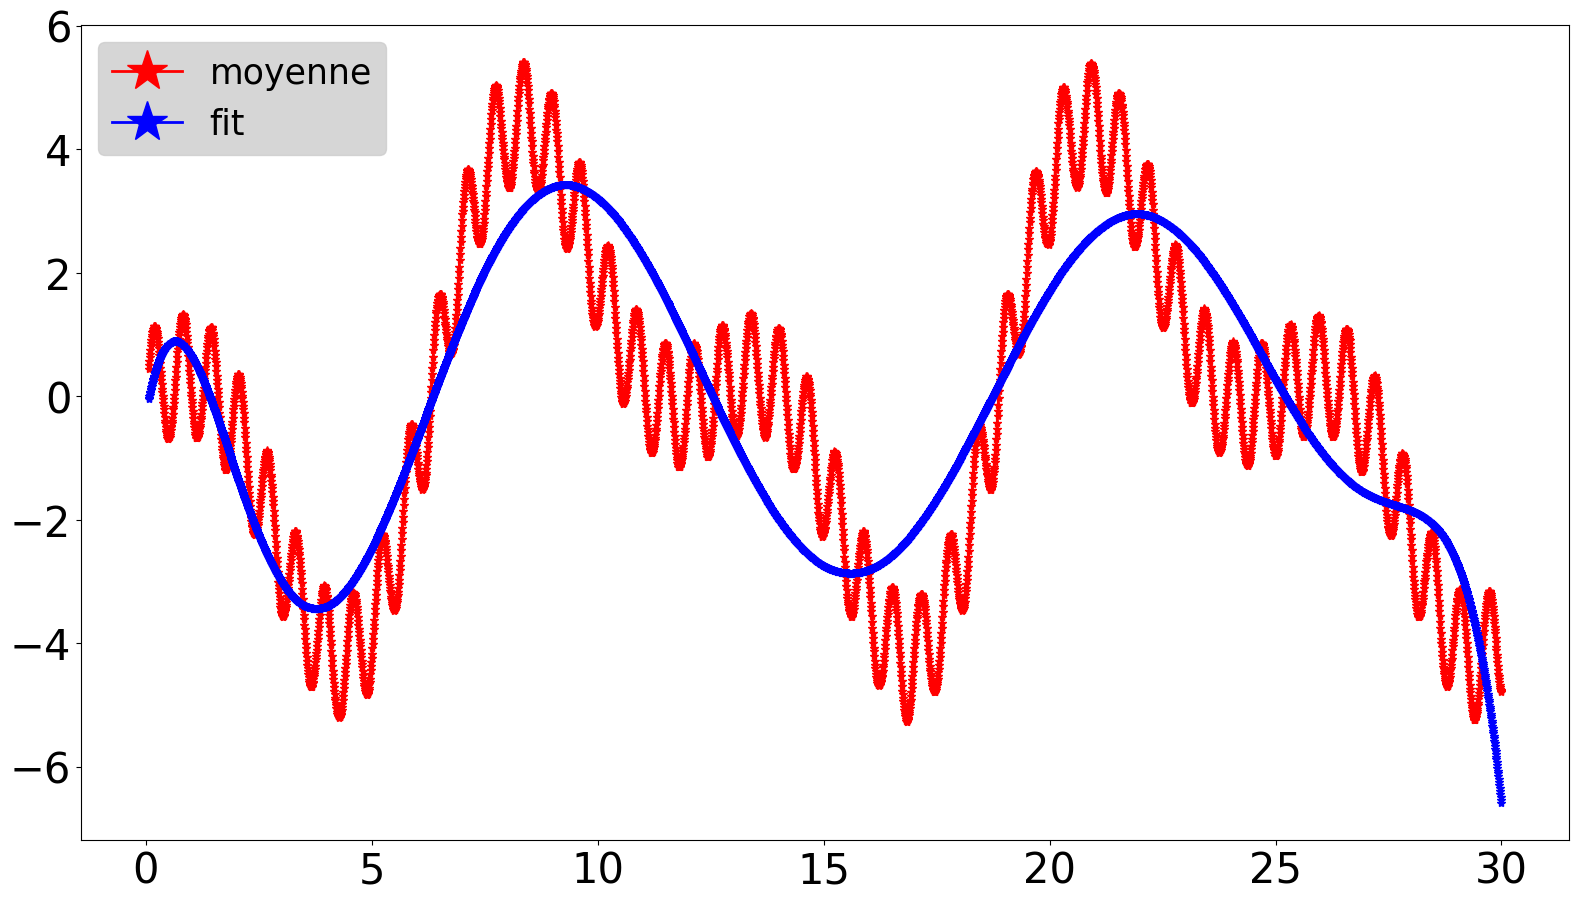

In [119]:
fig2 = plt.figure(figsize=(19.20,10.80), dpi=100)
n_col = 1
n_row = 1

ax3 = plt.subplot2grid((n_row,n_col), (0,0),rowspan = 1, colspan=1)

ax3.plot(x_mean,y_mean,'r-*',markersize=6,linewidth = 2,label='moyenne')
ax3.plot(x_mean,fitted_vector,'b-*',markersize=6,linewidth = 2,label='fit')
legenda3 = ax3.legend(loc=2,markerscale =5, facecolor = '#CCCCCC', prop={'size': 25})
ax3.tick_params(axis='both', labelsize=30)
plt.show()

### Rearranger le vecteur de 4096 points en array de 64x64

In [139]:
y_64 = np.reshape(y,(64,64))

### Mettre à zero tout les valeurs au dessous de 10^-2

In [140]:
y_64[np.abs(y_64)<1e-2]=np.zeros(np.shape(y_64[np.abs(y_64)<1e-2]))

### Plot 2D

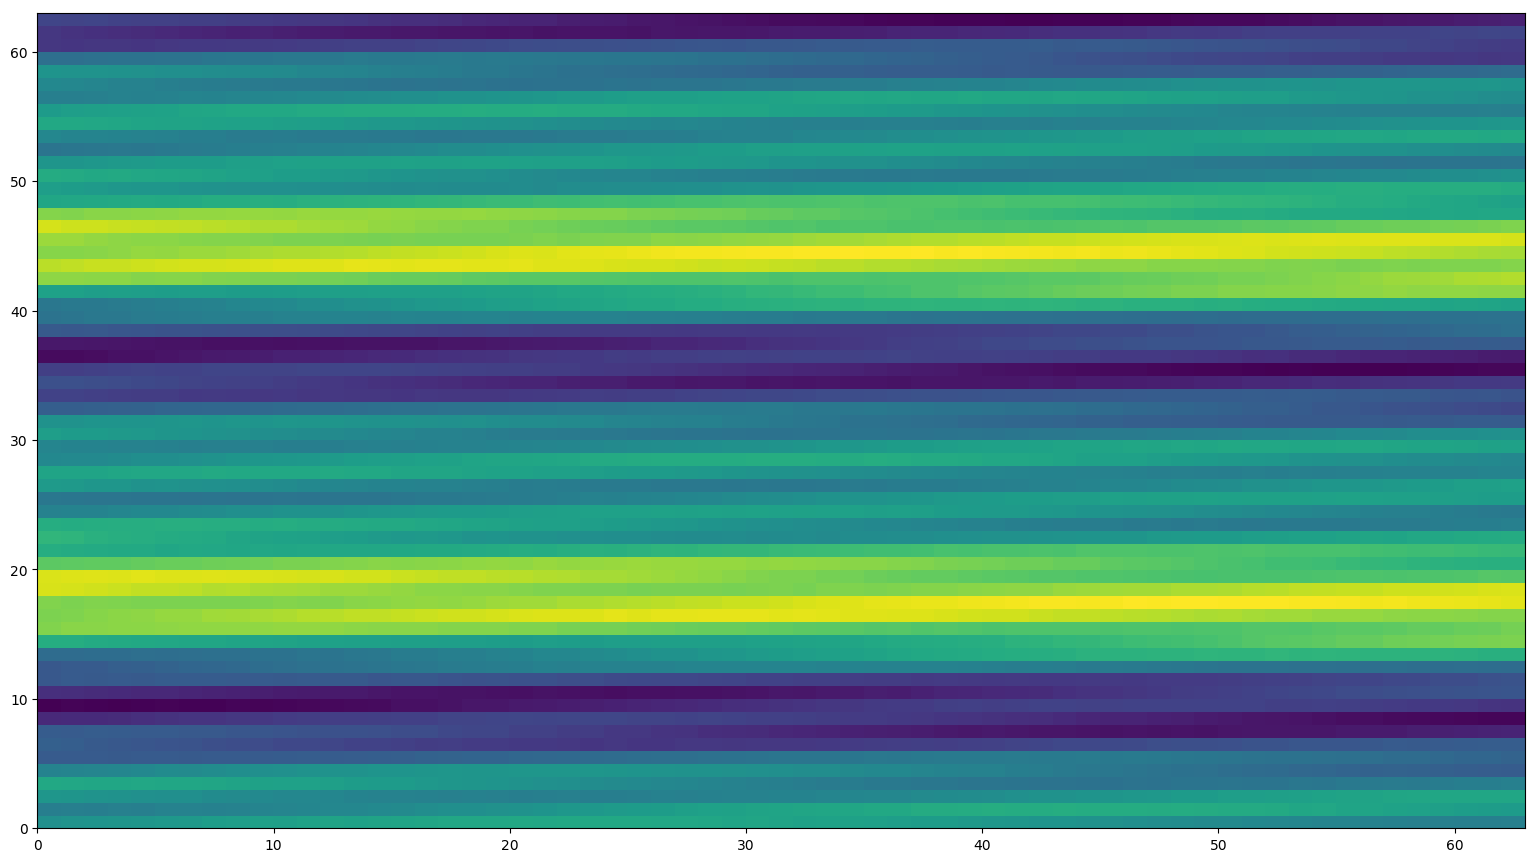

In [141]:
fig3 = plt.figure(figsize=(19.20,10.80), dpi=100)
n_col = 1
n_row = 1

ax4 = plt.subplot2grid((n_row,n_col), (0,0),rowspan = 1, colspan=1)

ax4.pcolormesh(np.arange(64),
              np.arange(64),
              y_64)
plt.show()